## In-Class Problem Set 2

**Problem:** Remove duplicates from a list but keep items in the original order. 

**Examples:**
<br>$[4,23,5,6,13,23,5,7]$ becomes $[4,23,5,6,13,7]$
<br>$[4,4,4,2,7]$ becomes $[4,2,7]$

If you feel up to it, write your code as a function that accepts the long list as an argument and returns the list with duplicates removed. 

In [4]:
y = []
x = [4,23,5,6,13,23,5,7]
for i in x:
    if i not in y:
        y.append(i)
    else:
        y = y
print(y)

[4, 23, 5, 6, 13, 7]


## In-Class Problem Set 3

**Problem:** Given a dictionary that contains names of people as keys and their ages (in integer format) as values, write a function that finds the name (or names) as a list of the second oldest person (or persons if there is a tie).

**Hint:** In Python, there is dictionary comprehension,which is very similar to list comprehension. There are three different variants of dictionary comprehension. You can work with just keys, just values or with key-value parirs. Basic syntac can look like this: 

**Examples:** 
<br>{'Adam': 12, 'Betsy': 11, 'Charles': 13, 'David': 15, 'Emma': 13} should result in ['Charles', 'Emma'] 
<br>since Charles and Emma are tied in age and the second-oldest in this group. Note, that the oldest age may appear more than once.

**Example_1**

In [1]:
d2 = {'Luke':19, 'Boba':32, 'Leia':19,'Anakin':42, 'Yoda':896}
{name.lower(): 2*age for (name,age) in d2.items() if age>21}

{'boba': 64, 'anakin': 84, 'yoda': 1792}

**Example_2**

In [3]:
d1 = {'Adam':15, 'Betsy':11, 'Charles':13, 'David':15, 'Emma':13}
[age+10 for age in d1.values() if age%2!=0]

[25, 21, 23, 25, 23]

In [5]:
# Way_1: for loop
def sec_old(dic):
    ls = []
    age = sorted(set(dic.values()))[-2]
    for name in dic.keys():
        if dic[name] == age:
            ls.append(name)
    return ls
sec_old(d1)

['Charles', 'Emma']

In [7]:
# Way2: dictionary comprehension
def sec_old_com(dic):
    return [name for (name,age) in dic.items() if d1[name]==sorted(set(dic.values()))[-2]]
sec_old_com(d1)

['Charles', 'Emma']

## In-Class Problem Set 4

**Problem:** Write a function that includes n zeros between each of the values in a given one-dimensional NumPy array. 

Example: 

array([3,4,6,2,4,8]) would become array([3,0,0,4,0,0,6,0,0,2,0,0,4,0,0,8]) for p=2. 

array([1., 2., 5., 1.]) would become array([1., 0., 0., 0., 2., 0., 0., 0., 5., 0., 0., 0., 1.]) for p=3 

(note the different data type in this latter case). 

In [22]:
import numpy as np

x = np.array([3,4,6,2,4,8])
y = np.array([1., 2., 5., 1.])
# feel free to create your own array for development, too

def insert_zeros(x,p):
    """Function creates p zeros each of appropriate data type between values in X"""
    data_type = x.dtype                                        # find data type of entries in x
    new_array = np.zeros(len(x)+p*(len(x)-1), dtype=data_type) # create matrix of zeros to hold x and enough zeros
    new_array[::p+1] = x                                       # populate every p+1st entry with values in x
    return new_array

# check your work when you're done
print(np.array_equal(insert_zeros(x,2), np.array([3, 0, 0, 4, 0, 0, 6, 0, 0, 2, 0, 0, 4, 0, 0, 8])))
print(np.array_equal(insert_zeros(y,3), np.array([1., 0., 0., 0., 2., 0., 0., 0., 5., 0., 0., 0., 1.])))

True
True


**Problem:** Consider the two NumPy "mini"-arrays A and B we worked with in class, previously. Stack A and B to make a 2-by-2-by2 array - that is, stack them on top of each other, one array per slice, A in front.

In [38]:
A = np.array([[1,1],[1,1]])
B = np.array([[2,2],[2,2]])

np.concatenate([A[np.newaxis,:,:], B[np.newaxis,:,:]],axis=0)  # add slice-dimension first, then stack them slicewise

array([[[1, 1],
        [1, 1]],

       [[2, 2],
        [2, 2]]])

In [3]:
prices = [6,0,-1,10]
prices[len(prices)-1]

10

In [ ]:
import pandas as pd
import numpy as np

letters = 'abcdefghijklmnopqrstuvwxyz'
numbers = range(1,27)

df = pd.DataFrame({'Letter':[let for let in letters], 'Number':numbers})
new = df.groupby(['Letter'])
vowels = ['a','e','i','o','u']
vowels = ['a','e','i','o','u']


## In-Class Problem Set 5

**Problem:** Construct a Pandas Data Frame. In one columns should be the letters in the English alphabet and in the other column should be the integers 1,..,26.

In [1]:
import numpy as np
import pandas as pd

letters = 'abcdefghijklmnopqrstuvwxyz'
numbers = range(1,27)

df = pd.DataFrame({'Letters':list(letters), 'Numbers':numbers})
df

,Letters,Numbers
0,a,1
1,b,2
2,c,3
3,d,4
4,e,5
5,f,6
6,g,7
7,h,8
8,i,9
9,j,10


**Problem:** Set the letters as the index and find the average rank of the vowels using Pandas.

In [2]:
df = pd.DataFrame({'Letters':list(letters), 'Numbers':numbers})
df.set_index(['Letters'], inplace = True)
df
df.loc[['a','e','i','o','u']].Numbers.mean()

10.2

## In-Class Problem Set 6
**Problem:** Consider the following data on results (think test values) for six different people at four different time points. We have information on the patients (anonymized), their gender, and their test results. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Patient = np.array([[i]*4 for i in range(1,7)]).reshape(24)
Time = np.array([1,2,3,4]*6)
Gender = np.array(['F']*12 + ['M']*12)
Result = np.array([1, 4, 5, 5, 1, 5, 5, 5, 1, 5, 4, 4, 1, 6, 6, 7, 2, 7, 6, 8, 2, 7, 8, 6])

data = pd.DataFrame({'Patient' : Patient, 'Time':Time, 'Gender': Gender, 'Result': Result})
data

,Patient,Time,Gender,Result
0,1,1,F,1
1,1,2,F,4
2,1,3,F,5
3,1,4,F,5
4,2,1,F,1
5,2,2,F,5
6,2,3,F,5
7,2,4,F,5
8,3,1,F,1
9,3,2,F,5


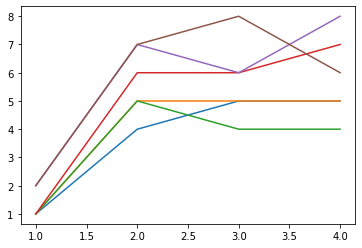

In [2]:
data[Patient==1].Result

for i in range(1,7):
    plt.plot(data[Patient==i].Time, data[Patient==i].Result)


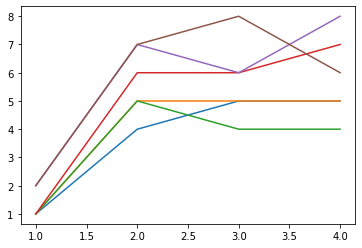

In [3]:
fig = plt.figure() 
ax = plt.axes()

for patient in range(1,7):
    ax.plot(data[Patient==patient].Time, data[Patient==patient].Result);

# fig.savefig('In-Class-Prob-6_Figure-1.png')

Text(0, 0.5, 'Result')

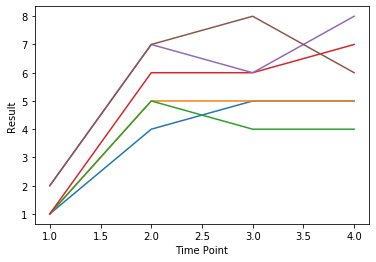

In [4]:
fig = plt.figure() 
ax = plt.axes()

for patient in range(1,7):
    ax.plot(data[Patient==patient].Time, data[Patient==patient].Result)
    
ax.set_xlabel('Time Point')
ax.set_ylabel('Result')

#fig.savefig('In-Class-Prob-6_Figure-2.png')

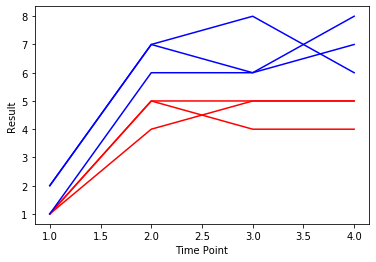

In [5]:
fig = plt.figure() 
ax = plt.axes()

for patient in range(1,7):
    if data[Patient==patient].Gender.values[0]=='F':
        col = 'red'
    else:
        col = 'blue'
    ax.plot(data[Patient==patient].Time, data[Patient==patient].Result, color = col)

ax.set_xlabel('Time Point')
ax.set_ylabel('Result');

#fig.savefig('In-Class-Prob-6_Figure-3.png')

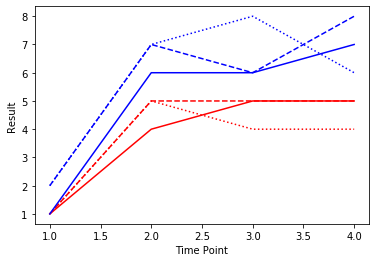

In [6]:
fig = plt.figure() 
ax = plt.axes()

style = ['solid', 'dashed', 'dotted']*2

for patient in range(1,7):
    if data[Patient==patient].Gender.values[0]=='F':
        col = 'red'
    else:
        col = 'blue'
    ax.plot(data[Patient==patient].Time, data[Patient==patient].Result, color = col, linestyle = style[patient-1])

ax.set_xlabel('Time Point')
ax.set_ylabel('Result');

#fig.savefig('In-Class-Prob-6_Figure-4.png')

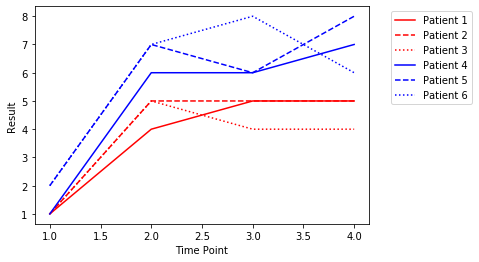

In [7]:
fig = plt.figure() 
ax = plt.axes()

style = ['solid', 'dashed', 'dotted']*2
for patient in range(1,7):
    if data[Patient==patient].Gender.values[0]=='F':
        col = 'red'
    else:
        col = 'blue'
    ax.plot(data[Patient==patient].Time, data[Patient==patient].Result, color = col, 
            linestyle = style[patient-1], label = 'Patient '+str(patient))

ax.set_xlabel('Time Point')
ax.set_ylabel('Result')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1)); # 

#fig.savefig('In-Class-Prob-6_Figure-5.png')

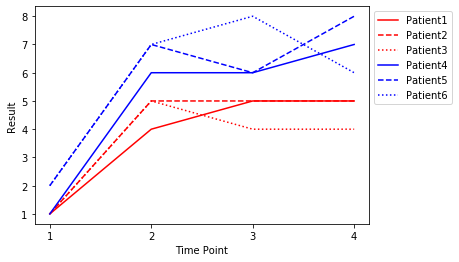

In [8]:
fig = plt.figure() 
ax = plt.axes()

style = ['solid', 'dashed', 'dotted']*2
for patient in range(1,7):
    if data[Patient==patient].Gender.values[0]=='F':
        col = 'red'
    else:
        col = 'blue'
    ax.plot(data[Patient==patient].Time, data[Patient==patient].Result, color = col, 
            linestyle = style[patient-1], label = 'Patient'+str(patient))

ax.set_xlabel('Time Point')
ax.set_ylabel('Result')
ax.set_xticks(range(1,5))
ax.legend(loc='upper left', bbox_to_anchor=(1, 1));

#fig.savefig('In-Class-Prob-6_Figure-6.png')